# Lecture 9 - Motor Control
### Introduction to modeling and simulation of human movement
https://github.com/BMClab/bmc/blob/master/courses/ModSim2018.md

* In class:

In [1]:
import numpy as np
#import pandas as pd
#import pylab as pl
import matplotlib.pyplot as plt
import math

%matplotlib notebook

### Muscle properties

In [2]:
Lslack = .223
Umax = .04
Lce_o = .093 #optmal l
width = .63
Fmax = 3000
a = .25
b = .25*10

### Initial conditions

In [3]:
LceNorm = .087/Lce_o
t0 = 0
tf = 2.99
h = 1e-3
u = 1
a = 0

In [4]:
t = np.arange(t0,tf,h)
F = np.empty(t.shape)
Fkpe = np.empty(t.shape)
FiberLength = np.empty(t.shape)
TendonLength = np.empty(t.shape)
U = np.arange(t0,1,h)

In [5]:
## Funcoes

In [6]:
def computeTendonForce(LseeNorm, Lce_o, Lslack):
    '''
    Compute Tendon Length
    
    Input:
    
    LseeNorm - Normalized Tendon Length
    
    Lsalck - slack length of the tendon (non normalized)
    
    Lce_o - Optimal length of the fiber
    
    Output:
    
    FTendonNorm - Force on the tendon normalized
    '''
    
    Umax = 0.04
    if LseeNorm<(Lslack/Lce_o): 
        FTendonNorm = 0
    else: 
        FTendonNorm = ((LseeNorm-Lslack/Lce_o)/(Umax*Lslack/Lce_o))**2
    
    return FTendonNorm

In [7]:
def computeParallelElementForce (LceNorm):
    Umax = 1
    if LceNorm<1:
        FkpeNorm = 0
    else: 
        FkpeNorm = ((LceNorm-1)/(Umax))**2
    #lce_o/Lce_o = 1 (normalizado)
    
    return FkpeNorm

In [8]:
def computeForceLengthCurve(LceNorm):
    width = 0.63
    FLNorm = max([0, (1-((LceNorm-1)/width)**2)])
    return FLNorm

In [9]:
def computeActivation(a, u, h):
    act = 0.015
    deact = 0.05
    
    if u>a:
        T = act*(0.4+(1.5*a))
    else:
        T = deact/(0.5+(1.5*a))
    
    a += h*((u-a)/T)
    
    return a

In [10]:
def computeContractileElementDerivative(FLNorm, FCENorm, a):
     #calculate CE velocity from Hill's equation
    a1 = .25
    b = .25*10
    
    Fmlen = 1.8
    Vmax = 8
        
    
    if  FCENorm > a*FLNorm:
        B = ((2+2/a1)*(FLNorm*Fmlen-FCENorm))/(Fmlen-1)
        
        LceNormdot = (0.75+0.75*a)*Vmax*((FCENorm-FLNorm)/B)
        
    else:
        B = FLNorm + (FCENorm/a1)
        
        LceNormdot = (0.75+0.75*a)*Vmax*((FCENorm-FLNorm)/B)
    
    return LceNormdot
        

In [11]:
def computeContractileElementForce(FTendonNorm, FkpeNorm):
    FCENorm = FTendonNorm - FkpeNorm
    
    return FCENorm

In [12]:
def ComputeTendonLength(Lm, Lce_o, LceNorm):
    LseeNorm = Lm/Lce_o - LceNorm
    return LseeNorm

## Simulation - Parallel

In [13]:
for i in range (len(t)):
    #ramp
    if t[i]<=1:
        Lm = 0.31
    elif t[i]>1 and t[i]<2:
        Lm = .31 - .04*(t[i]-1)
        #print(Lm)
    
    #####################################################################
    LseeNorm = (Lm/Lce_o) - LceNorm
    
    FTendonNorm = computeTendonForce(LseeNorm, Lce_o, Lslack)
    
    FkpeNorm = computeParallelElementForce(LceNorm)
            
    FLNorm = computeForceLengthCurve(LceNorm)
    
    FCENorm = computeContractileElementForce(FTendonNorm, FkpeNorm)
        
    LceNormdot = computeContractileElementDerivative(FLNorm,FCENorm, a)
    
    a = computeActivation(a, u, h)

    LceNorm += h*LceNormdot
    #####################################################################
    
    F[i] = FTendonNorm*Fmax
    FiberLength[i] = LceNorm*Lce_o
    TendonLength[i] = LseeNorm*Lce_o
    

## Plot 

<IPython.core.display.Javascript object>


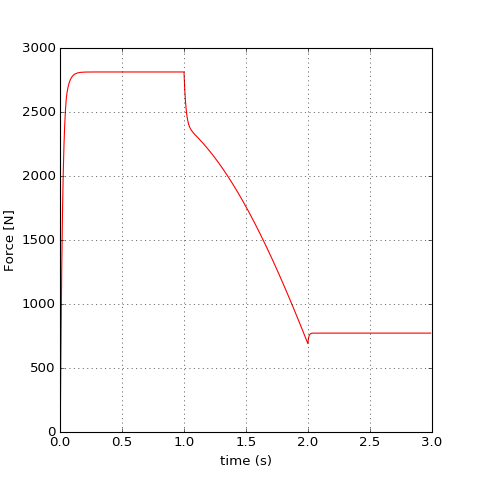

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,F,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force [N]')


#ax.legend()

<IPython.core.display.Javascript object>


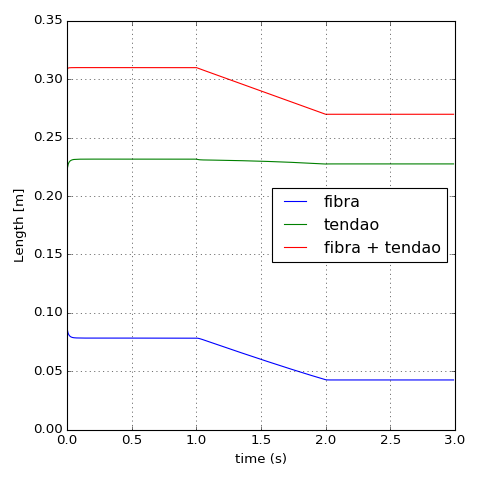

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,FiberLength, label = 'fibra')
ax.plot(t, TendonLength, label = 'tendao')
ax.plot(t,FiberLength + TendonLength, label = 'fibra + tendao')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('time (s)')
plt.ylabel('Length [m]')
plt.tight_layout()

#ax.legend()